In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [6]:
print(len(train_data))
print(len(test_data))

8982
2246


In [16]:
# We now vectorize the data by using one-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [25]:
# Then we one-hot encode the labels (there's a total of 46)
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [26]:
# Note that this can be done with built-in function in Keras
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building the network

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))# 64 hidden units to try to capture more info
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #46 different classes

In [40]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [41]:
# Create validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [42]:
# We can now train the model for 20 epochs
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 304us/step - loss: 2.5535 - acc: 0.5239 - val_loss: 1.7351 - val_acc: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.4242 - acc: 0.7106 - val_loss: 1.3153 - val_acc: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.0563 - acc: 0.7808 - val_loss: 1.1486 - val_acc: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.8294 - acc: 0.8247 - val_loss: 1.0559 - val_acc: 0.7670
Epoch 5/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.6598 - acc: 0.8617 - val_loss: 0.9753 - val_acc: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.5256 - acc: 0.8905 - val_loss: 0.9380 - val_acc: 0.7930
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.4240 - acc: 0.9108 - val_loss: 0.9350 - val_acc: 0.7980
Epoch 

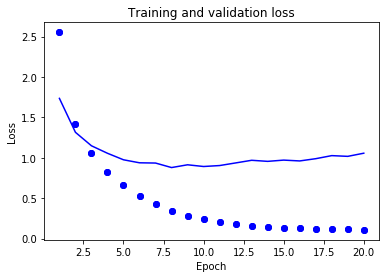

In [50]:
# And then let's display the results first plotting training and validation loss...
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend

plt.show()

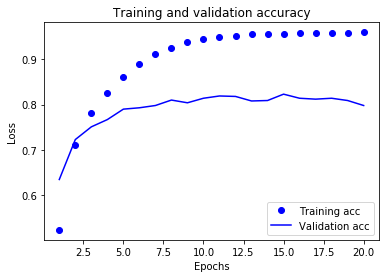

In [51]:
#... and then training and validation accuracy
plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
# The figure above suggests there may be overfitting after 9 epochs. We re-train the network from scratch
# Limiting the number of epochs to 9
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 120us/step - loss: 2.6131 - acc: 0.4654 - val_loss: 1.7283 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.4061 - acc: 0.7090 - val_loss: 1.2735 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.0408 - acc: 0.7798 - val_loss: 1.1025 - val_acc: 0.7640
Epoch 4/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.8165 - acc: 0.8320 - val_loss: 1.0265 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.6496 - acc: 0.8632 - val_loss: 0.9519 - val_acc: 0.8060
Epoch 6/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.5286 - acc: 0.8903 - val_loss: 0.9200 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.4207 - acc: 0.9113 - val_loss: 0.8986 - val_acc: 0.8160
Epoch 8/9
798

In [60]:
# We evaluate the model on the test set.
results = model.evaluate(x_test, one_hot_test_labels)
results
# Accuracy is ~80% which is pretty good considering that a random classifier would
# achieve about ~18%

2246/2246 [==============================] - 0s 121us/step


[0.98439220711257136, 0.78628673202101929]

### Encoding the labels as tensors

In [62]:
# Note that we one-hot encoded the labels, but we could have used an integer tensor, simply turning them
# into a numpy array like this
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
# The only difference in this case is that the loss function needs to be the
# `sparse_categorical_crossentropy`

### Avoid information bottlenecks


In [63]:
# If we have too few units in a layer, then the information that is lost
# can't be recovered any more. See the example below where we only have 4 hidden units
# in the middle layer. The accuracy is much lower.

In [70]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 121us/step - loss: 2.7476 - acc: 0.4085 - val_loss: 2.0162 - val_acc: 0.5810
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.6351 - acc: 0.6158 - val_loss: 1.5328 - val_acc: 0.6230
Epoch 3/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.3255 - acc: 0.6421 - val_loss: 1.4283 - val_acc: 0.6440
Epoch 4/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.1574 - acc: 0.6983 - val_loss: 1.3557 - val_acc: 0.6880
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.0205 - acc: 0.7548 - val_loss: 1.3134 - val_acc: 0.6970
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.9125 - acc: 0.7804 - val_loss: 1.3272 - val_acc: 0.7150
Epoch 7/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.8293 - acc: 0.7929 - val_loss: 1.3047 - val_acc: 0.7240
Epoch 

### Try changing the number of hidden units

In [77]:
### First, let's re-train our preferred model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 126us/step - loss: 2.5844 - acc: 0.5258 - val_loss: 1.7204 - val_acc: 0.6360
Epoch 2/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.4080 - acc: 0.7021 - val_loss: 1.3259 - val_acc: 0.7040
Epoch 3/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.0539 - acc: 0.7670 - val_loss: 1.1369 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.8322 - acc: 0.8231 - val_loss: 1.0433 - val_acc: 0.7650
Epoch 5/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.6665 - acc: 0.8612 - val_loss: 0.9743 - val_acc: 0.7900
Epoch 6/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.5374 - acc: 0.8881 - val_loss: 0.9255 - val_acc: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.4325 - acc: 0.9112 - val_loss: 0.9164 - val_acc: 0.8000
Epoch 8/9
798

In [78]:
# Then let's train two models with fewer or more hiddden units
modelF = models.Sequential()
modelF.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
modelF.add(layers.Dense(32, activation='relu'))
modelF.add(layers.Dense(46, activation='softmax'))
modelF.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyF = modelF.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

modelM = models.Sequential()
modelM.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
modelM.add(layers.Dense(32, activation='relu'))
modelM.add(layers.Dense(46, activation='softmax'))
modelM.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyM = modelM.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 126us/step - loss: 2.9842 - acc: 0.4941 - val_loss: 2.2070 - val_acc: 0.5960
Epoch 2/9
7982/7982 [==============================] - 1s 79us/step - loss: 1.8184 - acc: 0.6485 - val_loss: 1.6000 - val_acc: 0.6730
Epoch 3/9
7982/7982 [==============================] - 1s 79us/step - loss: 1.3625 - acc: 0.7212 - val_loss: 1.3468 - val_acc: 0.7130
Epoch 4/9
7982/7982 [==============================] - 1s 79us/step - loss: 1.1212 - acc: 0.7661 - val_loss: 1.2309 - val_acc: 0.7340
Epoch 5/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.9532 - acc: 0.7932 - val_loss: 1.1260 - val_acc: 0.7480
Epoch 6/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.8200 - acc: 0.8210 - val_loss: 1.0733 - val_acc: 0.7660
Epoch 7/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.7078 - acc: 0.8428 - val_loss: 1.0365 - val_acc: 0.7740
Epoch 8/9
798

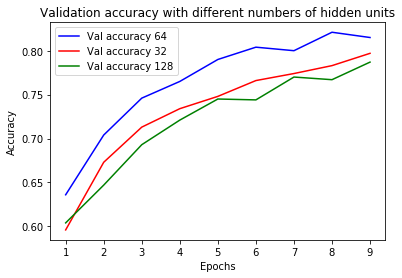

In [85]:
# We can now compare the validation accuracy of the three models
val = history.history['val_acc']
valF = historyF.history['val_acc']
valM = historyM.history['val_acc']

epochs = range(1, len(val)+1)

plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, val, 'b', label='Val accuracy 64')
plt.plot(epochs, valF, 'r', label='Val accuracy 32')
plt.plot(epochs, valM, 'g', label='Val accuracy 128')
plt.title('Validation accuracy with different numbers of hidden units')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# We can see that fewer or more hidden units lead to lower validation accuracy. In the former case, this may be due
# having a bit of an information bottleneck. In the second case, there may be too much overfitting.

### Changing the number of layers

In [86]:
# Now we try to change the number of layers (down to 1 and up to 3) and again
# observe how the validation accuracy varies.
modelF = models.Sequential()
modelF.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
modelF.add(layers.Dense(64, activation='relu'))
modelF.add(layers.Dense(46, activation='softmax'))
modelF.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyF = modelF.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

modelM = models.Sequential()
modelM.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
modelM.add(layers.Dense(64, activation='relu'))
modelM.add(layers.Dense(64, activation='relu'))
modelM.add(layers.Dense(46, activation='softmax'))
modelM.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyM = modelM.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 116us/step - loss: 2.7110 - acc: 0.5531 - val_loss: 1.7879 - val_acc: 0.6430
Epoch 2/9
7982/7982 [==============================] - 0s 52us/step - loss: 1.4363 - acc: 0.7132 - val_loss: 1.2920 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 0s 52us/step - loss: 1.0529 - acc: 0.7751 - val_loss: 1.1126 - val_acc: 0.7600
Epoch 4/9
7982/7982 [==============================] - 0s 53us/step - loss: 0.8294 - acc: 0.8270 - val_loss: 1.0180 - val_acc: 0.7830
Epoch 5/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.6576 - acc: 0.8654 - val_loss: 0.9508 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 0s 53us/step - loss: 0.5194 - acc: 0.8953 - val_loss: 0.9236 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 0s 53us/step - loss: 0.4146 - acc: 0.9163 - val_loss: 0.8807 - val_acc: 0.8080
Epoch 8/9
798

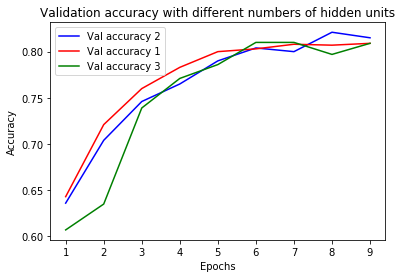

In [88]:
# We can now compare the validation accuracy of the three models
val = history.history['val_acc']
valF = historyF.history['val_acc']
valM = historyM.history['val_acc']

epochs = range(1, len(val)+1)

plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, val, 'b', label='Val accuracy 2')
plt.plot(epochs, valF, 'r', label='Val accuracy 1')
plt.plot(epochs, valM, 'g', label='Val accuracy 3')
plt.title('Validation accuracy with different numbers of hidden units')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# In this case the perfomance seems similar but learning is slower when there are 3 layers.